#Entity-Relationship Diagram (ERD) Model

The Entity-Relationship Diagram (ERD) model is a graphical representation used to design and visualize database schemas. It consists of entities, attributes, relationships, and constraints.

#Definition of the Entity-Relationship Diagram
In the ERD model, entities represent real-world objects or concepts, attributes describe properties of entities, and relationships depict associations between entities. The ERD provides a clear and concise overview of the database structure, facilitating communication between stakeholders during the design phase.

#Constraints - Multiplicity

Multiplicity constraints specify the cardinality of relationships between entities. They define the minimum and maximum number of instances that can participate in a relationship. Common multiplicities include one-to-one, one-to-many, and many-to-many relationships, each representing different types of associations between entities.

#Constraints - Participation
Participation constraints determine whether an entity's participation in a relationship is mandatory (total participation) or optional (partial participation). Total participation indicates that every entity instance in the entity set must participate in the relationship, while partial participation allows some entities to be independent of the relationship.

In [ ]:
# Import SQLite library
import sqlite3

# Connect to an in-memory database
conn = sqlite3.connect(':memory:')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create tables for students, courses, and instructors
cursor.execute('''CREATE TABLE IF NOT EXISTS students
                  (student_id INTEGER PRIMARY KEY, name TEXT, email TEXT)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS courses
                  (course_id INTEGER PRIMARY KEY, title TEXT, instructor_id INTEGER)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS instructors
                  (instructor_id INTEGER PRIMARY KEY, name TEXT, department TEXT)''')

# Create a table to represent the enrollment relationship between students and courses
cursor.execute('''CREATE TABLE IF NOT EXISTS enrollment
                  (student_id INTEGER, course_id INTEGER,
                  FOREIGN KEY(student_id) REFERENCES students(student_id),
                  FOREIGN KEY(course_id) REFERENCES courses(course_id),
                  PRIMARY KEY (student_id, course_id))''')

# Insert sample data into students, courses, and instructors tables
cursor.execute("INSERT INTO students (name, email) VALUES ('John Doe', 'john@example.com')")
cursor.execute("INSERT INTO students (name, email) VALUES ('Alice Smith', 'alice@example.com')")

cursor.execute("INSERT INTO instructors (name, department) VALUES ('Professor Smith', 'Computer Science')")
cursor.execute("INSERT INTO instructors (name, department) VALUES ('Professor Johnson', 'Mathematics')")

cursor.execute("INSERT INTO courses (title, instructor_id) VALUES ('Database Systems', 1)")
cursor.execute("INSERT INTO courses (title, instructor_id) VALUES ('Linear Algebra', 2)")

# Enroll students in courses
cursor.execute("INSERT INTO enrollment (student_id, course_id) VALUES (1, 1)")  # John Doe in Database Systems
cursor.execute("INSERT INTO enrollment (student_id, course_id) VALUES (2, 2)")  # Alice Smith in Linear Algebra

# Commit the transaction
conn.commit()

# Retrieve and print all students, courses, and instructors
cursor.execute("SELECT * FROM students")
print("Students:")
print(cursor.fetchall())

cursor.execute("SELECT * FROM courses")
print("\nCourses:")
print(cursor.fetchall())

cursor.execute("SELECT * FROM instructors")
print("\nInstructors:")
print(cursor.fetchall())

# Close the cursor and connection
cursor.close()
conn.close()

Students:
[(1, 'John Doe', 'john@example.com'), (2, 'Alice Smith', 'alice@example.com')]

Courses:
[(1, 'Database Systems', 1), (2, 'Linear Algebra', 2)]

Instructors:
[(1, 'Professor Smith', 'Computer Science'), (2, 'Professor Johnson', 'Mathematics')]


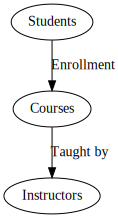

In [ ]:
# Install the required libraries
!pip install graphviz

# Import necessary libraries
from graphviz import Digraph

# Create a new graph
graph = Digraph()

# Define nodes for students, courses, and instructors
graph.node('students', label='Students')
graph.node('courses', label='Courses')
graph.node('instructors', label='Instructors')

# Define relationships between entities
graph.edge('students', 'courses', label='Enrollment')
graph.edge('courses', 'instructors', label='Taught by')

# Render and display the graph
graph.render('university_erd', format='png', cleanup=True)
graph